In [1]:
import pandas as pd
import numpy as np
import scipy
import xarray as xr
import dask 

import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
matplotlib.rcParams['font.family'] = 'sans-serif'

matplotlib.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans',
                               'Lucida Grande', 'Verdana']


/Users/justinsimcock/miniconda3/envs/dawp/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/justinsimcock/miniconda3/envs/dawp/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [38]:
fx_data = '/Users/justinsimcock/Resilio Sync/FXBootcamp/Daily/EURUSD.csv'
eur_usd = pd.read_csv(fx_data,header=None, names=['date', 'open', 'high', 'low', 'close', 'volume'])
eur_usd.head()

,date,open,high,low,close,volume
0,19990101,1.1661,1.1740,1.1644,1.1736,0
1,19990104,1.1799,1.1850,1.1773,1.1812,0
2,19990105,1.1750,1.1899,1.1740,1.1811,0
3,19990106,1.1811,1.1835,1.1741,1.1759,0
4,19990107,1.1759,1.1784,1.1561,1.1632,0


In [42]:
eur_usd['date'] = pd.to_datetime(eur_usd.date, format='%Y%m%d')
eur_usd['month'] = eur_usd.date.dt.month
eur_usd['year'] = eur_usd.date.dt.year
eur_usd['day_of_year'] = eur_usd.date.dt.dayofyear
eur_usd['weekday'] = eur_usd.date.dt.dayofweek
eur_usd['days_till_month_end'] = eur_usd.date.dt.days_in_month - eur_usd.date.dt.day
eur_usd['log_ret'] = np.log(eur_usd.close) - np.log(eur_usd.close.shift(1))

In [57]:
monthly_returns = eur_usd.groupby(['month', 'year']).sum().groupby(level=[0]).cumsum()['log_ret']

In [61]:
mr_xr = monthly_returns.to_xarray()

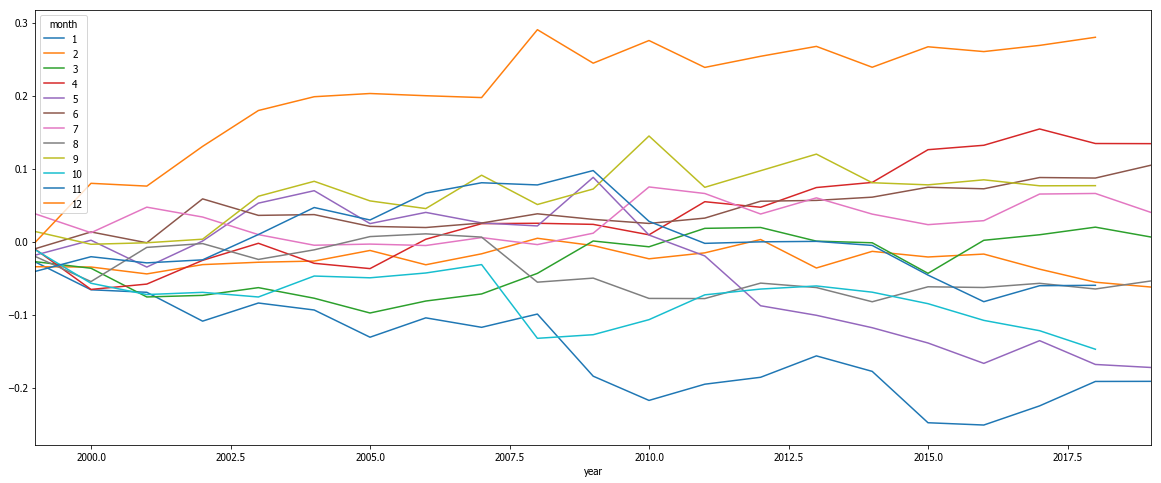

In [64]:
monthly_returns.unstack(level=0).plot(kind='line', subplots=False, figsize=(20,8));